In [32]:
# Data processing
import pandas as pd
import numpy as np
import json

# Modelling
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, precision_score, recall_score, f1_score, auc, average_precision_score
from sklearn.model_selection import train_test_split

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset split: 56000 train rows 56000 label rows
Dataset split: 14000 test rows 14000 label rows


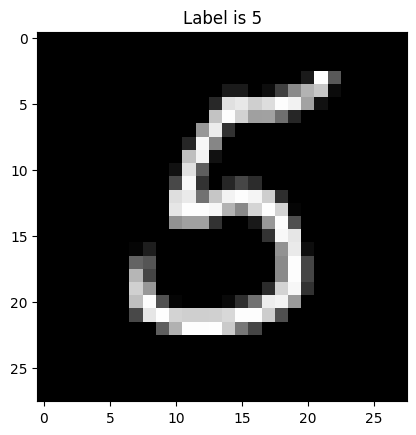

In [33]:
# Initialize
mnist = datasets.fetch_openml("mnist_784")
X, y = mnist.data, mnist.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# digits = load_digits()
print(f"Dataset split: {len(x_train)} train rows",
          f"{len(y_train)} label rows")

print(f"Dataset split: {len(x_test)} test rows",
          f"{len(y_test)} label rows")

point = np.array(x_train.iloc[0], dtype='uint8')
point = point.reshape((28, 28))

plt.title('Label is {label}'.format(label=y_train.iloc[0]))
plt.imshow(point, cmap='gray')
plt.show()

In [34]:
# Create a binary label for normal (1) and anomalies (0)
normal_class = 1
anomaly_class = 0

In [35]:
# Convert labels to binary format (1 for normal instances, 0 for anomalies)
y_test_binary = np.where(y_test == normal_class, 1, 0)

In [36]:
print(x_train.shape)
print(x_test.shape)

(56000, 784)
(14000, 784)


In [37]:
# normalize data
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# convert labels to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [38]:
model = svm.OneClassSVM(nu=0.05, kernel="linear")
model.fit(x_train)

OneClassSVM(kernel='linear', nu=0.05)

In [39]:
# predict
prediction = model.predict(x_test)

In [40]:
print(prediction)

[1 1 1 ... 1 1 1]


In [41]:
# Get anomaly indexes
anomaly_indexes = np.where(prediction == -1)[0]

# Display the anomaly indices
print("Anomaly Indexes:", anomaly_indexes)
print(len(anomaly_indexes))

Anomaly Indexes: [   49    52   105   130   157   158   180   182   217   221   222   224
   247   256   273   281   285   288   300   323   340   377   385   408
   419   420   427   432   498   519   531   567   574   585   609   611
   613   618   631   649   697   719   736   737   744   756   757   818
   839   879   891   915   956   979  1030  1061  1070  1096  1153  1162
  1181  1203  1223  1247  1255  1282  1289  1291  1292  1293  1300  1331
  1332  1367  1372  1405  1425  1442  1443  1460  1508  1528  1540  1556
  1582  1597  1658  1660  1695  1737  1747  1748  1792  1805  1855  1870
  1880  1903  1925  1926  1928  1999  2004  2036  2089  2118  2196  2212
  2236  2254  2263  2274  2286  2288  2296  2307  2324  2331  2367  2372
  2408  2423  2430  2480  2493  2500  2502  2527  2556  2565  2591  2593
  2617  2628  2653  2677  2684  2730  2744  2762  2764  2773  2779  2893
  2896  2897  2902  2910  2913  2916  2949  2952  2979  3009  3089  3096
  3115  3129  3132  3138  3150  31

In [42]:
# Convert the list of anomaly indexes to a NumPy array
anomaly_indexes_array = np.array(anomaly_indexes)

# Extract labels of anomalies
anomaly_labels = y_test.iloc[anomaly_indexes_array]

# Display the anomaly labels
print("Anomaly Labels:", anomaly_labels)

Anomaly Labels: 3284     9
3136     6
6501     5
30035    1
45967    7
        ..
60024    4
61224    2
41496    7
40514    6
36061    6
Name: class, Length: 755, dtype: int32


In [43]:
# Extract anomaly images from the test set
anomalies = x_test.iloc[anomaly_indexes_array]

print(len(anomalies))

755


In [44]:
# create a dict of indexes and labels
anomaly_dict = dict(zip(map(int, anomaly_indexes), anomaly_labels))

In [45]:
# write to json file
json_filename = "anomalies.json"
with open(json_filename, 'w') as json_file:
    json.dump(anomaly_dict, json_file)

print(f"Anomaly dictionary saved to {json_filename}")

Anomaly dictionary saved to anomalies.json


In [46]:
# Reshape the test data for plotting
x_test_reshaped = x_test.values.reshape(-1, 28, 28)

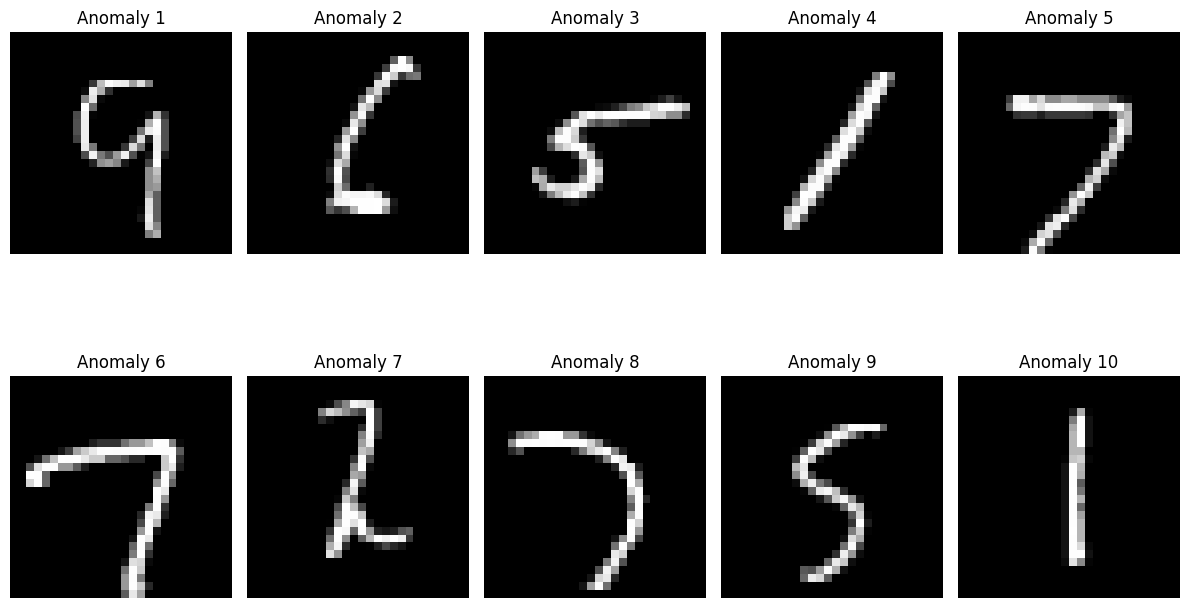

In [47]:
# Plot some of the anomalies
plt.figure(figsize=(12, 8))
for i, idx in enumerate(anomaly_indexes[:10]):  # Plot the first 10 anomalies
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_reshaped[idx], cmap='gray')
    plt.title(f'Anomaly {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
# Get anomaly scores
anomaly_scores = model.decision_function(x_test)

print("Anomaly Scores:", anomaly_scores)

Anomaly Scores: [48368.00400285 29672.01620168 20686.53803105 ... 13472.86597693
 21498.13940443 10433.35557631]


c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


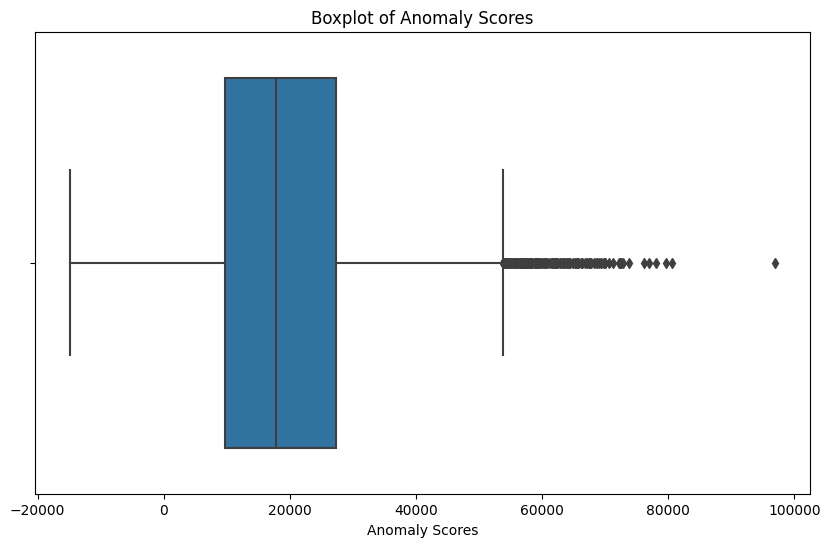

In [49]:
# Boxplot for all data
plt.figure(figsize=(10, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Boxplot of Anomaly Scores')
plt.xlabel('Anomaly Scores')
plt.show()

c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


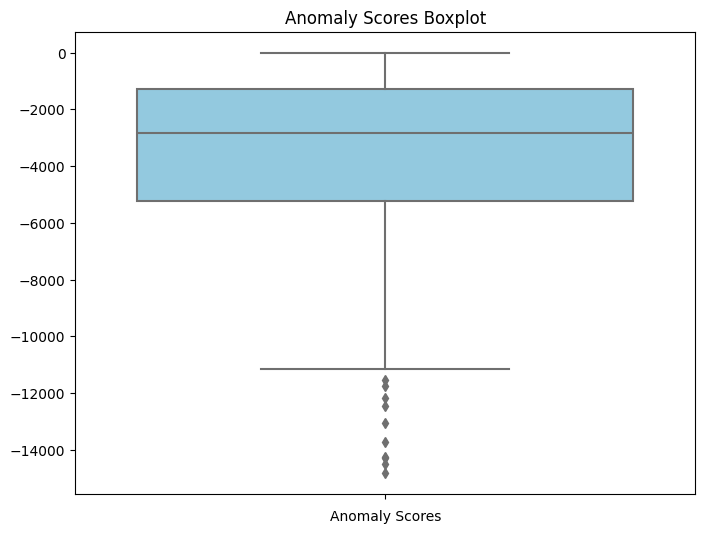

In [50]:
# Plot a boxplot for anomalies
plt.figure(figsize=(8, 6))
sns.boxplot(y=anomaly_scores[anomaly_indexes_array], color='skyblue')
plt.title('Anomaly Scores Boxplot')
plt.xlabel('Anomaly Scores')
plt.show()

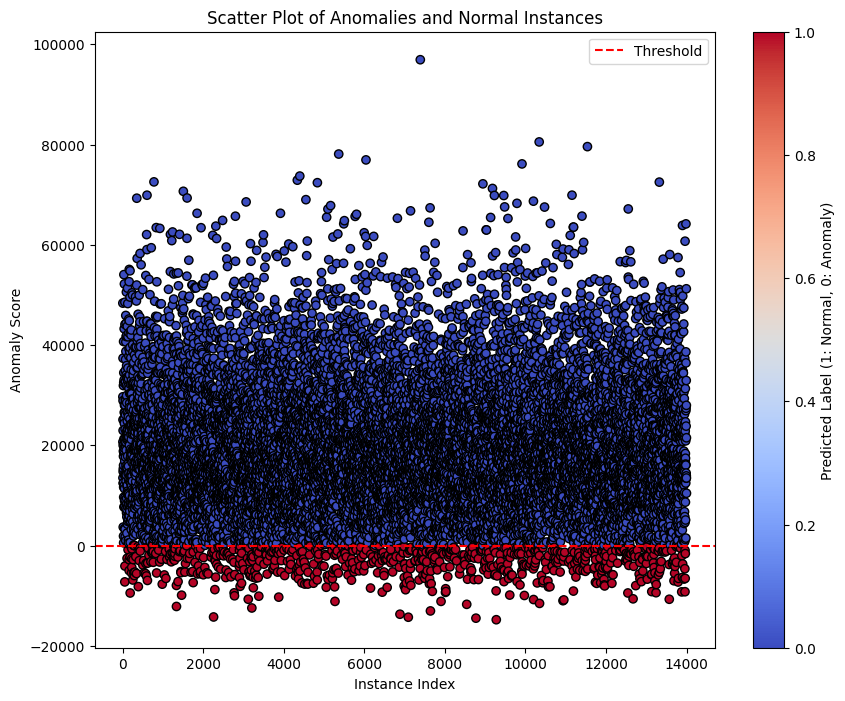

In [51]:
# Set a threshold for classifying anomalies
threshold = 0.0  # Adjust this threshold as needed

# Classify instances based on the threshold
predicted_labels = (anomaly_scores < threshold).astype(int)

# Scatter plot with anomalies and normal instances based on anomaly scores and threshold
plt.figure(figsize=(10, 8))
scatter = plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=predicted_labels, cmap='coolwarm', marker='o', edgecolors='k')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Instance Index')
plt.ylabel('Anomaly Score')
plt.title('Scatter Plot of Anomalies and Normal Instances')
plt.legend()
plt.colorbar(scatter, label='Predicted Label (1: Normal, 0: Anomaly)')
plt.show()

In [52]:
# Create ground truth labels for anomalies (1 if anomaly, 0 otherwise)
true_labels = np.zeros(len(y_test))
true_labels[anomaly_indexes_array] = 1

In [53]:
# Map the class labels to "anomaly" and "normal" for true labels
class_labels = {0: 'normal', 1: 'anomaly'}
true_labels_mapped = np.vectorize(class_labels.get)(true_labels)

In [54]:
# Ensure that true_labels_mapped and prediction are binary (0 or 1)
true_labels_binary = np.where(true_labels_mapped == 'anomaly', 1, 0)
prediction_binary = np.where(prediction == -1, 1, 0)

In [55]:
# Calculate metrics
accuracy = accuracy_score(true_labels_binary, prediction_binary)
precision = precision_score(true_labels_binary, prediction_binary)
recall = recall_score(true_labels_binary, prediction_binary)
f1 = f1_score(true_labels_binary, prediction_binary)

In [56]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [57]:
# Classification report
report = classification_report(true_labels_binary, prediction_binary, target_names=['normal', 'anomaly'])

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13245
     anomaly       1.00      1.00      1.00       755

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



In [58]:
# Get precision, recall, and thresholds
precision_curve, recall_curve, _ = precision_recall_curve(true_labels_binary, anomaly_scores)

# Calculate PR-AUC
pr_auc = auc(recall_curve, precision_curve)

print("PR-AUC:", pr_auc)

PR-AUC: 0.02746250869591027


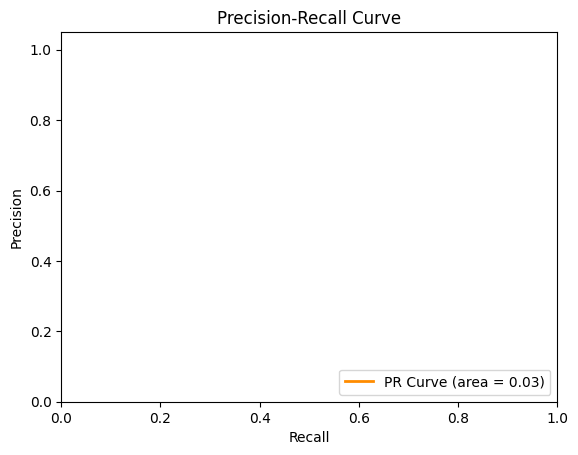

In [59]:
# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels_binary, prediction_binary)

In [61]:
print(conf_matrix)

[[13245     0]
 [    0   755]]


In [62]:
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 13245
False Positives: 0
False Negatives: 0
True Positives: 755
